In [14]:
import numpy as np

#### Классы для нейронной сети

In [15]:
class Neuron:
    def __init__(self, input_size, activation):
        self.weights = np.random.randn(input_size) * 0.01
        self.bias = 0.0
        self.activation = activation
    
    def activate(self, x):
        if self.activation == "linear":
            return x
        elif self.activation == "sigmoid":
            if x > 500:
                return 1 
            elif x < -500:
                return 0
            else:
                return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activate(z)
    
    def compute_gradient(self, x, grad_output):
        grad_w = x * grad_output
        grad_b = grad_output
        return grad_w, grad_b


In [16]:
class NeuralNetwork:
    def __init__(self):
        self.neuron1 = Neuron(2, "linear")
        self.neuron2 = Neuron(2, "linear")
        
        self.output_neuron = Neuron(2, "sigmoid")
    
    def forward(self, x):
        out1 = self.neuron1.forward(x)
        out2 = self.neuron2.forward(x)
        output = self.output_neuron.forward(np.array([out1, out2]))
        return output
    
    def compute_loss(self, prediction, target):
        # Логлос
        epsilon = 1e-15
        prediction = np.clip(prediction, epsilon, 1 - epsilon)
        return - (target * np.log(prediction) + (1 - target) * np.log(1 - prediction))
    
    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                prediction = self.forward(X[i])
                # нейронка провела pаботу от входа к выходу
                
                loss = self.compute_loss(prediction, y[i])
                total_loss += loss
                
                # Вычисление градиентов 
                grad_output = prediction - y[i]
                
                out1 = self.neuron1.forward(X[i])
                out2 = self.neuron2.forward(X[i])
                grad_out_w, grad_out_b = self.output_neuron.compute_gradient(np.array([out1, out2]), grad_output)
                
                # Градиенты для первого слоя
                grad1 = self.neuron1.weights * grad_output
                grad2 = self.neuron2.weights * grad_output
                grad1_w, grad1_b = self.neuron1.compute_gradient(X[i], grad1[0])
                grad2_w, grad2_b = self.neuron2.compute_gradient(X[i], grad2[1])
                
                # Обновление весов и смещений
                self.output_neuron.weights -= learning_rate * grad_out_w
                self.output_neuron.bias -= learning_rate * grad_out_b

                self.neuron1.weights -= learning_rate * grad1_w
                self.neuron1.bias -= learning_rate * grad1_b

                self.neuron2.weights -= learning_rate * grad2_w
                self.neuron2.bias -= learning_rate * grad2_b
            
            # Печать среднего значения потерь
            avg_loss = total_loss / len(X)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {avg_loss}")
    
    def predict(self, X):
        return [1 if self.forward(x) >= 0.5 else 0 for x in X]
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


#### Генерация обучающей и валидационной выборок

In [17]:
def generate_data(N, num_points):
    X = np.random.uniform(-N, N, (num_points, 2)) #координаты х,у
    y = (X[:, 1] > -X[:, 0]).astype(int) #если выше прямой, то 1, иначе 0
    return X, y

train_X, train_y = generate_data(10, 10000)
val_X, val_y = generate_data(20, 100)

#### Обучение и оценка

In [18]:
network = NeuralNetwork()
network.train(train_X, train_y, learning_rate=0.1, epochs=5)

accuracy = network.accuracy(val_X, val_y)
print(f"Validation accuracy: {accuracy}")

Epoch 0, Loss: 3.1628213352202392
Validation accuracy: 0.88


In [19]:
val_X

array([[ 8.04467679e+00, -1.62392346e+01],
       [ 5.31984103e+00,  3.40776399e+00],
       [-1.51707934e+01, -1.30418354e+01],
       [ 1.46579803e+01,  1.53909119e+01],
       [ 1.54251895e+01, -1.48785465e+01],
       [-1.97355386e+01, -1.08712823e+01],
       [ 1.43775137e+01,  5.62265873e+00],
       [-1.47870099e+00, -1.33339333e+01],
       [ 4.75281152e+00,  8.35750045e+00],
       [-4.82702093e+00, -3.39040353e+00],
       [ 5.34143588e+00,  4.55991308e+00],
       [-1.46913900e+01, -1.93596992e+01],
       [-1.73792879e+01,  1.57685895e+01],
       [-9.25843103e+00, -5.24944164e+00],
       [-1.77336503e+00,  1.55108190e+01],
       [-1.95236748e+01,  1.06115029e+00],
       [ 3.12013012e+00,  1.66679911e+01],
       [-1.51704478e+01, -1.35457898e+01],
       [ 1.52697502e+01, -1.89671033e+01],
       [ 1.78753471e+01, -7.54135781e+00],
       [ 3.82374575e+00, -6.76931735e+00],
       [-8.83198973e+00,  6.84268409e+00],
       [-1.32946602e+01, -4.05205938e+00],
       [-3.

In [20]:
res_val_y = (val_X[:, 1] > -val_X[:, 0]).astype(int)

In [21]:
val_y

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [22]:
res_val_y

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

#### Визуализация

In [23]:
import matplotlib.pyplot as plt

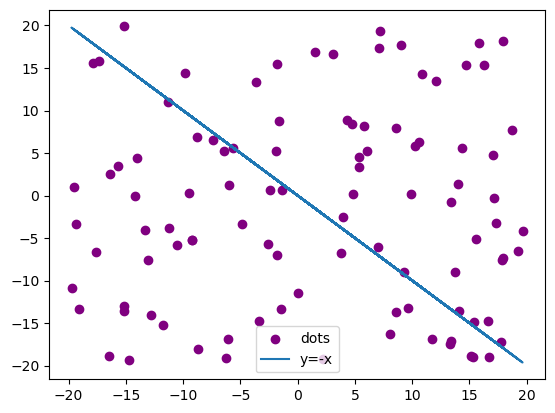

In [24]:
plt.scatter(val_X[:, 0], val_X[:,1], color='purple', label='dots')
plt.plot(val_X[:,0], -val_X[:,0], label='y=-x')
plt.legend()
plt.show()